In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

In [224]:
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [225]:
# Ex. 1.: Please follow the steps below:
# add a column with values '1'
if "Ones" not in data:
  data.insert(0,"Ones",1)
data.head()

,Ones,Exam 1,Exam 2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [226]:
# divide the data into parameters (X) and labels/classes (y)
X_pd = data.iloc[:, [0,1,2]]
y_pd = data.iloc[:,[3]]


In [227]:
# data conversion to numpy 
X = np.array(X_pd.values)
y = np.array(y_pd.values)

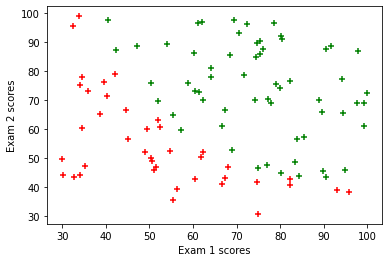

In [228]:
# Ex. 2.: Please plot the loaded data in the graph
yT = y.T[0]
colormap = np.array(['r', 'g'])
plt.scatter(X[:,1], X[:,2],c= colormap[yT],marker= "+")
plt.xlabel("Exam 1 scores")
plt.ylabel("Exam 2 scores")
plt.show()

In [229]:
# Ex. 3.: Earlier, we said that we want our hθ(x) 
# classifier to match the property:
def sig(t):
  return 1/(1+np.exp(-t))



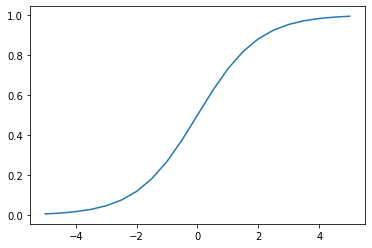

In [230]:
# Ex. 4.: Using the function np.arange or np.linspace, please generate data 
# from the range [-5.5], step 0.5 and check the correct operation of the
# implemented function by plotting it.

dat1 = np.linspace(-5,5,21)
y1 = []
for yi in dat1:
  y1.append(sig(yi))

plt.plot(dat1,y1)

In [237]:
def cost(theta, X, y):
  return 1/(len(y))*(-y.T@np.log(sig(X@theta))-(1-y).T@np.log(1-sig(X@theta)))


theta = np.zeros(3)
print(f'Cost: {cost(theta,X,y)}')

Cost: 0.6931471805599453


In [234]:
# Ex. 6.: Please implement simple gradient function:
def simple_gradient(X, y, theta, alpha, it):
    # it - iteration nb.
    costs = []
    for i in range(it):
        h = sig(X @ theta)
        for k in range(3):
            theta[k] = theta[k] - alpha/len(y) * np.sum((np.subtract(h.T,y).T) @ (np.matrix(X[:,k]).T)) 
        costs.append(cost(theta,X,y))
    return theta, costs

In [236]:
# normalize data
data["Exam 1"] = [(i - data["Exam 1"].mean())/data["Exam 1"].std() for i in data["Exam 1"]]
data["Exam 2"] = [(i - data["Exam 2"].mean())/data["Exam 2"].std() for i in data["Exam 2"]]
X=np.array(data[["Ones","Exam 1","Exam 2"]])
y=np.array(data["Admitted"])

alpha = 1
it = 150
theta = np.zeros(3)
cost(theta, X, y)
th, cst=simple_gradient(X,y,theta,alpha,it)
print(f'Theta: {th}')
print(f'Cost: {cst[-1]}')

Theta: [1.41682812 3.36988187 3.122184  ]
Cost: 0.2064705442318259


In [247]:
# Ex. 7.: Please present the accuracy of the algorithm performance.
# Prediction values will be in the range [0; 1]. Threshold value = 0.5.
pred = (sig(X.dot(th)) >= 0.5).astype(int)
print(f'Prediction: {pred}')

Prediction: [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1]


In [255]:
admitted = np.array(data['Admitted'])
acc = np.count_nonzero([admitted == pred])/len(pred)
print(f'Accuracy: {acc}')

Accuracy: 0.89


# Logistic regression - Python

In [263]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score
 
iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target

In [257]:
logreg = LogisticRegression()
logreg.fit(X, Y)

LogisticRegression()

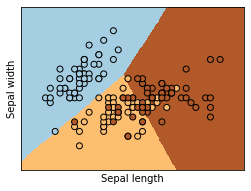

In [258]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
 
plt.show()

In [266]:
pr_proba = logreg.predict_proba(X)
print(pr_proba)

[[9.23473153e-01 5.85080967e-02 1.80187501e-02]
 [7.91565001e-01 1.80912648e-01 2.75223510e-02]
 [9.42364041e-01 5.08634498e-02 6.77250960e-03]
 [9.40553540e-01 5.37594346e-02 5.68702546e-03]
 [9.61853130e-01 2.96143932e-02 8.53247725e-03]
 [9.43195775e-01 3.40879207e-02 2.27163048e-02]
 [9.80228540e-01 1.74171057e-02 2.35435467e-03]
 [9.22927337e-01 6.19217567e-02 1.51509067e-02]
 [9.35998984e-01 5.99949470e-02 4.00606950e-03]
 [8.47181712e-01 1.31165035e-01 2.16532530e-02]
 [8.90214168e-01 7.01091740e-02 3.96766576e-02]
 [9.60793368e-01 3.31735691e-02 6.03306252e-03]
 [8.43554938e-01 1.38305338e-01 1.81397240e-02]
 [9.67965497e-01 3.01509884e-02 1.88351450e-03]
 [8.24095093e-01 7.61837358e-02 9.97211711e-02]
 [9.65419483e-01 1.34828235e-02 2.10976937e-02]
 [9.43195775e-01 3.40879207e-02 2.27163048e-02]
 [9.23473153e-01 5.85080967e-02 1.80187501e-02]
 [7.79417961e-01 1.12636786e-01 1.07945252e-01]
 [9.73286839e-01 1.91694663e-02 7.54369519e-03]
 [7.32310638e-01 1.85523196e-01 8.216616

In [265]:
print(f"Accuracy 1: {accuracy_score(Y, logreg.predict(X))}")
print(f"Accuracy 2: {logreg.score(X,Y)}")


Accuracy 1: 0.82
Accuracy 2: 0.82
